In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [4]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [5]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
path = r"C:\Users\kssin\Downloads\WESAD\S3\S3.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

In [6]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(4545100, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7200 -0.1382  3.1934 -0.756638  0.005951  7.988358  31.499023   
1        0.5688 -0.2286  3.1822 -0.708206 -0.038544  7.982254  31.501953   
2        0.3998 -0.3132  2.9450 -0.673965 -0.049438  7.983398  31.521149   
3        0.2454 -0.3838  2.4716 -0.535721 -0.014465  7.981873  31.510834   
4        0.0938 -0.4466  1.8758 -0.321808  0.027603  7.978821  31.516724   
...         ...     ...     ...       ...       ...       ...        ...   
4545095  0.9150  0.0514  0.0192 -0.345840  0.034149  7.535934  33.213867   
4545096  0.9086  0.0554  0.0006 -0.304916 -0.039139  7.533646  33.225922   
4545097  0.9018  0.0586 -0.0078 -0.248474 -0.116043  7.532120  33.228973   
4545098  0.9074  0.0762  0.0026 -0.185989 -0.110825  7.530594  33.215393   
4545099  0.9682  0.1834  0.1800 -0.141769 -0.064865  7.534027  33.242523   

           c_resp  w_label  
0        2.204895      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7200 -0.1382  3.1934 -0.756638  0.005951  7.988358  31.499023   
1        0.5688 -0.2286  3.1822 -0.708206 -0.038544  7.982254  31.501953   
2        0.3998 -0.3132  2.9450 -0.673965 -0.049438  7.983398  31.521149   
3        0.2454 -0.3838  2.4716 -0.535721 -0.014465  7.981873  31.510834   
4        0.0938 -0.4466  1.8758 -0.321808  0.027603  7.978821  31.516724   
...         ...     ...     ...       ...       ...       ...        ...   
4545095  0.9150  0.0514  0.0192 -0.345840  0.034149  7.535934  33.213867   
4545096  0.9086  0.0554  0.0006 -0.304916 -0.039139  7.533646  33.225922   
4545097  0.9018  0.0586 -0.0078 -0.248474 -0.116043  7.532120  33.228973   
4545098  0.9074  0.0762  0.0026 -0.185989 -0.110825  7.530594  33.215393   
4545099  0.9682  0.1834  0.1800 -0.141769 -0.064865  7.534027  33.242523   

           c_resp  w_label  
0        2.204895      0

## Concatenate classes 0, 1, 2, 3, and 4
Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated¶

In [9]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [10]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.7200,-0.1382,3.1934,-0.756638,0.005951,7.988358,31.499023,2.204895,0.0
1,0.5688,-0.2286,3.1822,-0.708206,-0.038544,7.982254,31.501953,2.180481,0.0
2,0.3998,-0.3132,2.9450,-0.673965,-0.049438,7.983398,31.521149,2.166748,0.0
3,0.2454,-0.3838,2.4716,-0.535721,-0.014465,7.981873,31.510834,2.191162,0.0
4,0.0938,-0.4466,1.8758,-0.321808,0.027603,7.978821,31.516724,2.183533,0.0
...,...,...,...,...,...,...,...,...,...
4337093,0.8424,0.0074,-0.3826,0.048477,-0.011536,7.132721,33.412933,0.996399,4.0
4337094,0.8430,0.0070,-0.3810,0.035019,-0.001236,7.132721,33.358612,1.005554,4.0
4337095,0.8410,0.0084,-0.3842,0.026917,-0.001419,7.127380,33.390289,0.810242,4.0
4337096,0.8432,0.0084,-0.3838,0.019455,-0.007416,7.126999,33.381226,0.950623,4.0


In [11]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4400200.0,0.858898,0.075757,-6.600000,0.837800,0.864400,0.902200,2.981400
c_ay,4400200.0,0.002051,0.070809,-6.600000,-0.035800,-0.004200,0.035400,1.322400
c_az,4400200.0,0.023153,0.313910,-6.600000,-0.275600,0.010800,0.279400,4.508200
c_ecg,4400200.0,0.000789,0.296225,-1.500000,-0.138885,-0.042435,0.030350,1.499954
c_emg,4400200.0,-0.003427,0.037869,-1.500000,-0.013596,-0.003159,0.007004,1.464340
c_eda,4400200.0,7.470869,0.979743,0.000000,6.982040,7.312393,7.638931,16.365433
c_temp,4400200.0,32.548406,1.543557,-273.149994,31.904022,32.805328,33.185272,34.521973
c_resp,4400200.0,0.052747,3.969669,-50.000000,-1.972961,-0.187683,2.281189,19.686890
w_label,4400200.0,1.060294,1.409490,0.000000,0.000000,0.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

4545100 4400200
Number of Rows Removed: 144900


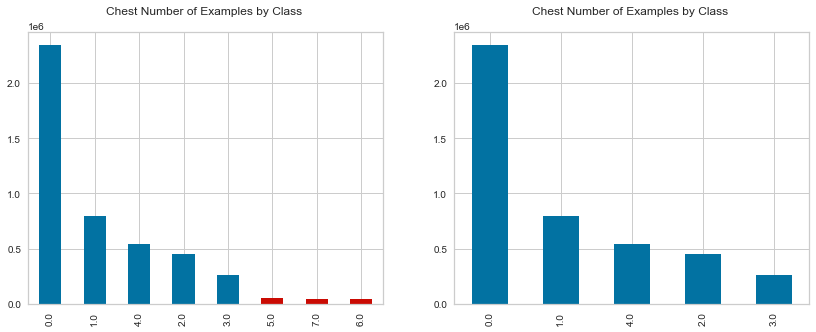

In [12]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.064200
c_ay       0.070400
c_az       0.525600
c_ecg      0.169006
c_emg      0.020599
c_eda      0.687408
c_temp     1.275391
c_resp     4.287720
w_label    2.000000
dtype: float64


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2953541, 9)


In [15]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [16]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
75,3.406454,0.174821,0.604486,0.706157,1.605532,1.492919,-1.237302,0.681774,-0.862304
76,3.210547,0.133814,0.475985,0.684893,0.996265,1.483485,-1.242767,0.679210,-0.862304
77,3.072880,0.125615,0.322614,0.729987,1.539581,1.482699,-1.231838,0.689980,-0.862304
78,2.834614,0.133814,0.167860,0.780581,0.217407,1.477982,-1.235456,0.684339,-0.862304
79,2.596345,0.178919,-0.011764,0.879934,0.544025,1.482699,-1.235456,0.676132,-0.862304


In [17]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06,2.953541e+06
mean,3.108386e-14,4.144832e-14,1.555668e-13,-8.814264e-16,1.442396e-16,-1.626604e-13,-1.116033e-12,7.639181e-16,-5.912211e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.349759e+00,-2.916890e+00,-2.187293e+00,-2.606603e+00,-2.850915e+00,-2.195965e+00,-2.358781e+00,-2.857148e+00,-8.623036e-01
25%,-7.499940e-01,-7.313715e-01,-1.117146e+00,-6.158671e-01,-5.551696e-01,-8.397573e-01,-7.974913e-01,-6.209595e-01,-8.623036e-01
50%,-1.304991e-01,-1.327112e-01,7.579863e-03,1.162690e-01,3.849289e-03,-4.961910e-02,3.632166e-01,-7.883768e-02,-2.213629e-01
75%,8.914073e-01,6.012631e-01,8.863584e-01,6.313672e-01,5.440248e-01,5.777743e-01,8.138430e-01,6.730551e-01,1.060518e+00
max,3.443521e+00,2.856489e+00,3.504040e+00,2.807611e+00,2.802084e+00,2.882148e+00,2.471868e+00,2.907705e+00,2.342400e+00


In [18]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953541 entries, 75 to 4545096
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 225.3 MB


In [19]:
norm_df_out.shape

(2953541, 9)

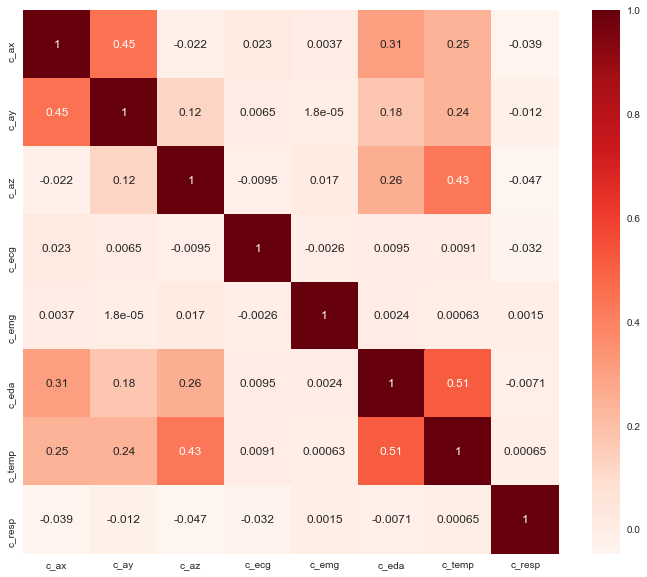

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_ecg      0.000000e+00
c_emg      2.476095e-07
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    7.217387e-162
dtype: float64

In [22]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
706263,-0.718226,-0.272125,-1.180705,0.649698,-0.285082,-1.556778,-1.597261,-0.472222
405060,-0.908840,-0.710870,-1.239429,-0.860768,0.006990,0.275084,-1.557353,-0.031652
2118650,-0.315818,-1.252123,1.257352,2.227622,0.848659,0.396947,-0.147968,-0.058322
1341813,2.977573,1.130216,-0.004856,-0.689924,0.876924,-1.065399,-0.555786,1.508036
4317467,-0.421713,-0.120410,-1.043914,-0.766547,-0.442110,-0.205288,1.052082,0.358142
...,...,...,...,...,...,...,...,...
396974,-0.887661,-0.653463,-1.231829,0.834474,0.173439,0.502298,-1.399231,-0.891764
4130567,-0.988260,-0.243422,-1.287098,-0.085371,0.142034,0.369429,0.724645,0.874620
1349501,1.262044,1.388541,0.178914,0.396365,0.355591,-1.068544,-0.550246,-0.212701
3042237,0.870228,-0.063005,-0.511949,1.273682,-0.966582,-0.426212,0.570630,0.005276


In [23]:
norm_y_train

706263     1.0
405060     1.0
2118650    0.0
1341813    0.0
4317467    4.0
          ... 
396974     1.0
4130567    4.0
1349501    0.0
3042237    4.0
4085919    4.0
Name: w_label, Length: 2362832, dtype: float64

In [24]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3577784,1.140265,-0.522250,0.070449,0.026081,-1.205264,1.835706,0.728338,-0.099353
1533141,1.209097,-0.067105,0.250764,-1.698123,0.462370,-1.033951,-0.907152,-0.067554
1988513,0.547242,0.634065,0.422098,-2.108002,2.227362,0.530602,-0.770057,-0.370158
719188,-1.099455,-0.423841,-1.226993,-0.738317,0.870643,-1.538696,-1.530108,0.496622
3009008,0.669022,0.187121,-0.571364,-0.788911,0.644523,-0.314571,0.578091,0.921292
...,...,...,...,...,...,...,...,...
3305790,0.753741,-0.005598,0.904321,-1.250116,-1.283778,0.013277,0.642983,-0.996906
1171906,-0.464073,0.777581,1.248371,-0.539611,0.192283,-0.912875,-0.409006,-0.643014
1088375,0.234846,-0.665765,0.892576,1.047845,1.247509,-1.131440,-0.760862,-0.896380
440757,-1.131223,-0.858485,-1.371384,-0.560508,-0.385580,-0.311426,-1.863763,0.160168


In [25]:
norm_y_test

3577784    3.0
1533141    0.0
1988513    2.0
719188     1.0
3009008    4.0
          ... 
3305790    0.0
1171906    0.0
1088375    5.0
440757     1.0
2201508    0.0
Name: w_label, Length: 590709, dtype: float64

In [26]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(2362832, 8)
(590709,)


75         0.0
76         0.0
77         0.0
78         0.0
79         0.0
          ... 
4545083    0.0
4545084    0.0
4545090    0.0
4545095    0.0
4545096    0.0
Name: w_label, Length: 2953541, dtype: float64

In [27]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
906389,0.8414,-0.0522,-0.3880,0.023392,0.001373,6.568527,31.513763,-1.995850
4259711,0.8506,-0.0078,-0.3604,-0.034332,-0.009476,7.272720,33.396332,3.363037
414874,0.8286,-0.0078,-0.4098,0.025955,-0.003845,7.331848,31.137054,-1.835632
3974301,0.8250,-0.0520,0.4018,-0.091232,-0.035385,7.712173,33.363129,-2.294922
1131103,0.8890,0.0068,0.2186,0.110275,0.009384,6.794357,32.010742,-1.612854
...,...,...,...,...,...,...,...,...
591922,0.8334,-0.0534,-0.4086,0.091736,0.000229,6.698608,30.829224,2.796936
2680641,0.9040,0.1206,-0.0580,0.005264,0.013641,7.539749,32.779846,2.738953
3814537,0.9014,0.0392,0.1086,0.008469,0.009567,7.734680,33.179260,-5.012512
1267222,0.8922,0.1326,0.1050,-0.026047,-0.033829,6.871414,32.312469,-3.900146


In [28]:
(y_train)

906389     1.0
4259711    4.0
414874     1.0
3974301    0.0
1131103    0.0
          ... 
591922     1.0
2680641    0.0
3814537    0.0
1267222    0.0
137365     0.0
Name: w_label, Length: 2362832, dtype: float64

In [29]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2131904,0.8478,-0.0574,0.3654,-0.001190,0.001144,7.414627,32.421234,2.571106
1387263,0.9006,0.0530,0.0306,-0.177658,-0.016617,6.810379,32.064178,1.239014
1234611,0.8786,-0.0018,0.2622,-0.057999,0.003159,6.832504,32.334778,-1.885986
1586797,0.9330,-0.0298,0.0318,0.041565,0.019272,6.905746,32.058228,-4.393005
982689,0.8410,-0.0522,-0.3934,-0.337097,0.010574,6.620407,31.658417,-1.765442
...,...,...,...,...,...,...,...,...
4090174,0.8370,-0.0074,-0.3882,-0.134537,-0.011536,7.486725,33.218414,-0.958252
460230,0.8602,-0.1110,-0.3526,-0.112839,0.021194,7.081223,30.940521,-0.856018
385116,0.8490,-0.0338,-0.3790,-0.031998,0.005768,7.661057,31.528503,0.904846
686491,0.8406,-0.0110,-0.3806,0.033005,-0.025040,6.536865,31.078308,-2.423096


In [30]:
(y_test)

2131904    0.0
1387263    0.0
1234611    0.0
1586797    2.0
982689     1.0
          ... 
4090174    4.0
460230     1.0
385116     1.0
686491     1.0
4006383    0.0
Name: w_label, Length: 590709, dtype: float64

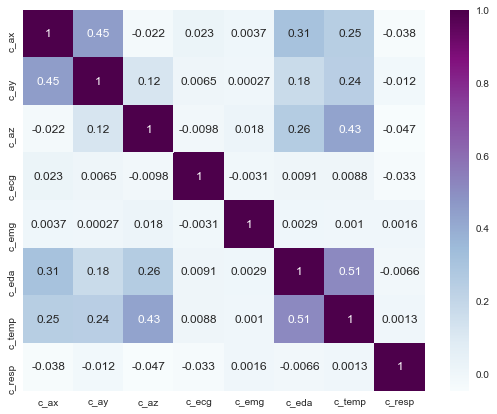

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

# XGBoost 
(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)

In [32]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [33]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[15:10:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[15:10:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 614 extra nodes, 206 pruned nodes, max_depth=10
[15:10:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 320 extra nodes, 270 pruned nodes, max_depth=10
[15:10:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 366 extra nodes, 156 pruned nodes, max_depth=10
[15:10:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost

[15:11:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 120 pruned nodes, max_depth=10
[15:11:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 58 pruned nodes, max_depth=10
[5]	validation_0-merror:0.10074	validation_1-merror:0.10163
[15:11:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 478 extra nodes, 152 pruned nodes, max_depth=10
[15:11:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 284 extra nodes, 80 pruned nodes, max_depth=10
[15:11:52] INFO: C:/buildkite-

[15:12:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 150 pruned nodes, max_depth=10
[15:12:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 146 pruned nodes, max_depth=10
[15:12:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 152 pruned nodes, max_depth=10
[11]	validation_0-merror:0.06063	validation_1-merror:0.06130
[15:12:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 240 extra nodes, 164 pruned nodes, max_depth=10
[15:12:53] INFO: C:/buildkit

[15:14:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 336 extra nodes, 164 pruned nodes, max_depth=10
[15:14:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 50 pruned nodes, max_depth=10
[15:14:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 324 extra nodes, 176 pruned nodes, max_depth=10
[15:14:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 114 pruned nodes, max_depth=9
[17]	validation_0-merror:0.04034	validation_1-merror:0.04124
[15:14:15] INFO: C:/buildkite-

[15:15:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 118 pruned nodes, max_depth=10
[15:15:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 606 pruned nodes, max_depth=10
[15:15:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 58 pruned nodes, max_depth=10
[15:15:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 86 pruned nodes, max_depth=10
[15:15:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[28]	validation_0-merror:0.03135	validation_1-merror:0.03209
[15:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 472 extra nodes, 166 pruned nodes, max_depth=10
[15:16:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 58 pruned nodes, max_depth=10
[15:16:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 246 pruned nodes, max_depth=10
[15:16:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 36 pruned nodes, max_depth=10
[15:16:44] INFO: C:/buildkite

[15:17:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 64 pruned nodes, max_depth=10
[34]	validation_0-merror:0.02404	validation_1-merror:0.02482
[15:17:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 260 pruned nodes, max_depth=10
[15:17:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 92 pruned nodes, max_depth=10
[15:17:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 388 extra nodes, 192 pruned nodes, max_depth=10
[15:17:49] INFO: C:/buildkite-

[15:18:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 70 pruned nodes, max_depth=10
[15:18:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 12 pruned nodes, max_depth=3
[40]	validation_0-merror:0.01945	validation_1-merror:0.02019
[15:18:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 192 extra nodes, 402 pruned nodes, max_depth=10
[15:18:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 134 pruned nodes, max_depth=10
[15:18:52] INFO: C:/buildkite-ag

[15:19:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 100 pruned nodes, max_depth=10
[15:19:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 222 extra nodes, 172 pruned nodes, max_depth=10
[15:19:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 130 pruned nodes, max_depth=8
[46]	validation_0-merror:0.01764	validation_1-merror:0.01834
[15:19:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 254 pruned nodes, max_depth=10
[15:19:56] INFO: C:/buildkite

[15:20:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 188 pruned nodes, max_depth=9
[15:20:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 184 pruned nodes, max_depth=9
[15:20:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 572 pruned nodes, max_depth=10
[15:20:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 30 pruned nodes, max_depth=2
[52]	validation_0-merror:0.01676	validation_1-merror:0.01750
[15:21:01] INFO: C:/buildkite-agent

[15:21:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 48 pruned nodes, max_depth=10
[15:21:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 260 extra nodes, 194 pruned nodes, max_depth=10
[15:22:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 198 pruned nodes, max_depth=10
[15:22:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 124 pruned nodes, max_depth=10
[15:22:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221

[63]	validation_0-merror:0.01380	validation_1-merror:0.01451
[15:23:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 178 pruned nodes, max_depth=10
[15:23:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 220 pruned nodes, max_depth=10
[15:23:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 236 pruned nodes, max_depth=10
[15:23:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 308 pruned nodes, max_depth=10
[15:23:08] INFO: C:/buildkite

[15:24:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 30 pruned nodes, max_depth=7
[69]	validation_0-merror:0.01314	validation_1-merror:0.01389
[15:24:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 194 pruned nodes, max_depth=10
[15:24:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 80 pruned nodes, max_depth=10
[15:24:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 136 pruned nodes, max_depth=10
[15:24:13] INFO: C:/buildkite-a

[15:25:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 176 pruned nodes, max_depth=10
[15:25:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 92 pruned nodes, max_depth=9
[75]	validation_0-merror:0.01231	validation_1-merror:0.01310
[15:25:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 76 pruned nodes, max_depth=10
[15:25:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 160 pruned nodes, max_depth=2
[15:25:18] INFO: C:/buildkite-agen

[15:26:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 260 pruned nodes, max_depth=10
[15:26:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 122 pruned nodes, max_depth=10
[15:26:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 66 pruned nodes, max_depth=8
[81]	validation_0-merror:0.01097	validation_1-merror:0.01177
[15:26:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 312 pruned nodes, max_depth=10
[15:26:21] INFO: C:/buildkite-a

[15:27:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 152 pruned nodes, max_depth=10
[15:27:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 96 pruned nodes, max_depth=10
[15:27:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 104 pruned nodes, max_depth=10
[15:27:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 46 pruned nodes, max_depth=6
[87]	validation_0-merror:0.01041	validation_1-merror:0.01126
[15:27:20] INFO: C:/buildkite-age

[15:28:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 42 pruned nodes, max_depth=4
[15:28:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 182 pruned nodes, max_depth=9
[15:28:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 162 pruned nodes, max_depth=7
[15:28:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 88 pruned nodes, max_depth=10
[15:28:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[98]	validation_0-merror:0.00929	validation_1-merror:0.01008
[15:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 234 pruned nodes, max_depth=8
[15:28:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 68 pruned nodes, max_depth=10
[15:28:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 238 pruned nodes, max_depth=10
[15:28:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 92 pruned nodes, max_depth=10
[15:29:00] INFO: C:/buildkite-age

[15:29:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 100 pruned nodes, max_depth=10
[104]	validation_0-merror:0.00881	validation_1-merror:0.00961
[15:29:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 612 pruned nodes, max_depth=9
[15:29:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 130 pruned nodes, max_depth=10
[15:29:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 116 pruned nodes, max_depth=7
[15:29:53] INFO: C:/buildkite-ag

[15:30:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 86 pruned nodes, max_depth=10
[15:30:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 54 pruned nodes, max_depth=8
[110]	validation_0-merror:0.00831	validation_1-merror:0.00905
[15:30:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 134 pruned nodes, max_depth=10
[15:30:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 152 pruned nodes, max_depth=4
[15:30:46] INFO: C:/buildkite-age

[15:31:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 104 pruned nodes, max_depth=10
[15:31:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 244 pruned nodes, max_depth=7
[15:31:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 62 pruned nodes, max_depth=5
[116]	validation_0-merror:0.00786	validation_1-merror:0.00862
[15:31:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 112 pruned nodes, max_depth=10
[15:31:37] INFO: C:/buildkite-a

[15:32:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 270 pruned nodes, max_depth=10
[15:32:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 68 pruned nodes, max_depth=10
[15:32:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 74 pruned nodes, max_depth=10
[15:32:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 40 pruned nodes, max_depth=7
[122]	validation_0-merror:0.00757	validation_1-merror:0.00830
[15:32:28] INFO: C:/buildkite-ag

[15:33:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 198 pruned nodes, max_depth=9
[15:33:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 228 pruned nodes, max_depth=10
[15:33:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 144 pruned nodes, max_depth=10
[15:33:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 104 pruned nodes, max_depth=6
[15:33:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[133]	validation_0-merror:0.00696	validation_1-merror:0.00761
[15:34:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 280 pruned nodes, max_depth=10
[15:34:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 112 pruned nodes, max_depth=10
[15:34:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 202 pruned nodes, max_depth=7
[15:34:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 296 pruned nodes, max_depth=9
[15:34:10] INFO: C:/buildkite-

[15:34:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 94 pruned nodes, max_depth=7
[139]	validation_0-merror:0.00666	validation_1-merror:0.00732
[15:34:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 532 pruned nodes, max_depth=10
[15:34:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 106 pruned nodes, max_depth=8
[15:34:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 164 pruned nodes, max_depth=1
[15:35:00] INFO: C:/buildkite-agen

[15:35:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 112 pruned nodes, max_depth=10
[15:35:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 180 pruned nodes, max_depth=10
[145]	validation_0-merror:0.00639	validation_1-merror:0.00705
[15:35:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 226 pruned nodes, max_depth=10
[15:35:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 138 pruned nodes, max_depth=10
[15:35:51] INFO: C:/buildkit

[15:36:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 252 pruned nodes, max_depth=10
[15:36:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 210 pruned nodes, max_depth=10
[15:36:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 134 pruned nodes, max_depth=9
[151]	validation_0-merror:0.00616	validation_1-merror:0.00683
[15:36:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 132 pruned nodes, max_depth=10
[15:36:47] INFO: C:/buildkit

[15:37:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 128 pruned nodes, max_depth=9
[15:37:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 200 pruned nodes, max_depth=9
[15:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 178 pruned nodes, max_depth=10
[15:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 64 pruned nodes, max_depth=1
[157]	validation_0-merror:0.00593	validation_1-merror:0.00652
[15:37:40] INFO: C:/buildkite-agen

[15:38:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 84 pruned nodes, max_depth=10
[15:38:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 116 pruned nodes, max_depth=2
[15:38:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 290 pruned nodes, max_depth=10
[15:38:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 196 pruned nodes, max_depth=7
[15:38:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[168]	validation_0-merror:0.00552	validation_1-merror:0.00614
[15:39:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 440 pruned nodes, max_depth=10
[15:39:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 120 pruned nodes, max_depth=0
[15:39:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 84 pruned nodes, max_depth=10
[15:39:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 156 pruned nodes, max_depth=10
[15:39:26] INFO: C:/buildkite-ag

[15:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 54 pruned nodes, max_depth=8
[174]	validation_0-merror:0.00540	validation_1-merror:0.00600
[15:40:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 262 pruned nodes, max_depth=8
[15:40:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 94 pruned nodes, max_depth=0
[15:40:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 156 pruned nodes, max_depth=0
[15:40:20] INFO: C:/buildkite-agent/bu

[15:41:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 148 pruned nodes, max_depth=9
[15:41:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 74 pruned nodes, max_depth=5
[180]	validation_0-merror:0.00521	validation_1-merror:0.00583
[15:41:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 484 pruned nodes, max_depth=3
[15:41:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 88 pruned nodes, max_depth=10
[15:41:17] INFO: C:/buildkite-agent/

[15:42:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 188 pruned nodes, max_depth=10
[15:42:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 200 pruned nodes, max_depth=10
[15:42:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 78 pruned nodes, max_depth=5
[186]	validation_0-merror:0.00506	validation_1-merror:0.00568
[15:42:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 338 pruned nodes, max_depth=0
[15:42:12] INFO: C:/buildkite-ag

[15:43:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 66 pruned nodes, max_depth=10
[15:43:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 254 pruned nodes, max_depth=4
[15:43:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 70 pruned nodes, max_depth=10
[15:43:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 114 pruned nodes, max_depth=5
[192]	validation_0-merror:0.00486	validation_1-merror:0.00548
[15:43:07] INFO: C:/buildkite-agen

[15:44:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 150 pruned nodes, max_depth=3
[15:44:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 108 pruned nodes, max_depth=10
[15:44:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 104 pruned nodes, max_depth=10
[15:44:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 218 pruned nodes, max_depth=5
[15:44:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[203]	validation_0-merror:0.00466	validation_1-merror:0.00528
[15:45:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 342 pruned nodes, max_depth=10
[15:45:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 48 pruned nodes, max_depth=7
[15:45:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 182 pruned nodes, max_depth=0
[15:45:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 76 pruned nodes, max_depth=10
[15:45:20] INFO: C:/buildkite-agen

[15:46:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 80 pruned nodes, max_depth=5
[209]	validation_0-merror:0.00456	validation_1-merror:0.00519
[15:46:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 346 pruned nodes, max_depth=10
[15:46:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 108 pruned nodes, max_depth=0
[15:46:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 172 pruned nodes, max_depth=5
[15:46:53] INFO: C:/buildkite-agent

[15:47:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 124 pruned nodes, max_depth=10
[15:47:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 76 pruned nodes, max_depth=4
[215]	validation_0-merror:0.00445	validation_1-merror:0.00508
[15:48:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 280 pruned nodes, max_depth=4
[15:48:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 48 pruned nodes, max_depth=10
[15:48:03] INFO: C:/buildkite-agent

[15:49:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 154 pruned nodes, max_depth=8
[15:49:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 108 pruned nodes, max_depth=10
[15:49:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 74 pruned nodes, max_depth=2
[221]	validation_0-merror:0.00438	validation_1-merror:0.00496
[15:49:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 144 pruned nodes, max_depth=10
[15:49:22] INFO: C:/buildkite-age

[15:50:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 116 pruned nodes, max_depth=6
[15:50:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 228 pruned nodes, max_depth=8
[15:50:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 164 pruned nodes, max_depth=8
[15:50:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 76 pruned nodes, max_depth=5
[227]	validation_0-merror:0.00424	validation_1-merror:0.00480
[15:50:52] INFO: C:/buildkite-agent

[15:51:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 132 pruned nodes, max_depth=9
[15:51:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 124 pruned nodes, max_depth=0
[15:52:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 112 pruned nodes, max_depth=10
[15:52:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 108 pruned nodes, max_depth=9
[15:52:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[238]	validation_0-merror:0.00401	validation_1-merror:0.00456
[15:52:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 226 pruned nodes, max_depth=10
[15:53:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 66 pruned nodes, max_depth=6
[15:53:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 148 pruned nodes, max_depth=9
[15:53:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 150 pruned nodes, max_depth=10
[15:53:05] INFO: C:/buildkite-ag

[15:53:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 66 pruned nodes, max_depth=1
[244]	validation_0-merror:0.00394	validation_1-merror:0.00451
[15:53:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 328 pruned nodes, max_depth=0
[15:53:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 144 pruned nodes, max_depth=8
[15:53:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 104 pruned nodes, max_depth=0
[15:54:01] INFO: C:/buildkite-agent/bu

[15:54:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 142 pruned nodes, max_depth=9
[15:54:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 64 pruned nodes, max_depth=1
[250]	validation_0-merror:0.00384	validation_1-merror:0.00442
[15:54:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 276 pruned nodes, max_depth=10
[15:54:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 52 pruned nodes, max_depth=7
[15:54:58] INFO: C:/buildkite-agent/

[15:55:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 218 pruned nodes, max_depth=8
[15:55:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 86 pruned nodes, max_depth=7
[15:56:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 60 pruned nodes, max_depth=6
[256]	validation_0-merror:0.00377	validation_1-merror:0.00435
[15:56:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 296 pruned nodes, max_depth=5
[15:56:03] INFO: C:/buildkite-agent/

[15:56:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 94 pruned nodes, max_depth=0
[15:56:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 204 pruned nodes, max_depth=8
[15:56:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 148 pruned nodes, max_depth=8
[15:56:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 54 pruned nodes, max_depth=10
[262]	validation_0-merror:0.00368	validation_1-merror:0.00426
[15:56:58] INFO: C:/buildkite-agent/

[15:57:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 66 pruned nodes, max_depth=7
[15:57:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 90 pruned nodes, max_depth=9
[15:57:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 78 pruned nodes, max_depth=10
[15:57:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 170 pruned nodes, max_depth=10
[15:57:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a

[273]	validation_0-merror:0.00358	validation_1-merror:0.00417
[15:58:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 256 pruned nodes, max_depth=0
[15:58:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 102 pruned nodes, max_depth=0
[15:58:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 120 pruned nodes, max_depth=8
[15:58:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 146 pruned nodes, max_depth=0
[15:58:43] INFO: C:/buildkite-agent/b

[15:59:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 58 pruned nodes, max_depth=4
[279]	validation_0-merror:0.00353	validation_1-merror:0.00414
[15:59:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 258 pruned nodes, max_depth=10
[15:59:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 122 pruned nodes, max_depth=7
[15:59:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 108 pruned nodes, max_depth=7
[15:59:38] INFO: C:/buildkite-agent

[16:00:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 186 pruned nodes, max_depth=3
[16:00:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 136 pruned nodes, max_depth=10
[285]	validation_0-merror:0.00350	validation_1-merror:0.00410
[16:00:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 368 pruned nodes, max_depth=7
[16:00:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 72 pruned nodes, max_depth=4
[16:00:35] INFO: C:/buildkite-agent/

[16:01:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 76 pruned nodes, max_depth=3
[16:01:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 144 pruned nodes, max_depth=0
[16:01:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 52 pruned nodes, max_depth=1
[291]	validation_0-merror:0.00345	validation_1-merror:0.00406
[16:01:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 320 pruned nodes, max_depth=9
[16:01:31] INFO: C:/buildkite-agent/bui

[16:02:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 164 pruned nodes, max_depth=9
[16:02:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 172 pruned nodes, max_depth=0
[16:02:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 140 pruned nodes, max_depth=3
[16:02:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 118 pruned nodes, max_depth=0
[297]	validation_0-merror:0.00341	validation_1-merror:0.00402
[16:02:33] INFO: C:/buildkite-agent/b

In [34]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9951
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9972    0.9938    0.9955    262202
           1     0.9974    0.9997    0.9986    130251
           2     0.9947    0.9964    0.9955     45590
           3     0.9930    0.9961    0.9945     47118
           4     0.9946    0.9975    0.9961     96549
           5     0.9790    0.9874    0.9832      8999

    accuracy                         0.9960    590709
   macro avg     0.9926    0.9951    0.9939    590709
weighted avg     0.9960    0.9960    0.9960    590709



# QDA + Normalization + Cross Validation = 10

In [35]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9281    0.9300    0.9291   1308546
         1.0     0.9940    0.9791    0.9865    652120
         2.0     0.7690    0.7681    0.7686    229036
         3.0     0.9238    0.8672    0.8946    236685
         4.0     0.9519    0.9879    0.9696    482406
         5.0     0.9062    0.9778    0.9406     44748

    accuracy                         0.9335   2953541
   macro avg     0.9122    0.9184    0.9148   2953541
weighted avg     0.9335    0.9335    0.9333   2953541



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9329    0.8923    0.9121   1308546
         1.0     0.9928    0.9565    0.9743    652120
         2.0     0.7729    0.8385    0.8044    229036
         3.0     0.8407    0.9019    0.8702    236685
         4.0     0.9188    0.9728    0.9450    482406
         5.0     0.6944    0.9402    0.7988     44748

    accuracy                         0.9169   2953541
   macro avg     0.8588    0.9170    0.8842   2953541
weighted avg     0.9204    0.9169    0.9178   2953541



# Individual and Combined Features 
Model shortChest: Less Electromyogram and Model ACC TEMP EDA

### Model shortChest: Less Electromyogram

#### XGBoost 

In [37]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3520160, 7)
(880040,)


In [38]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16:25:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[16:25:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 678 extra nodes, 228 pruned nodes, max_depth=10
[16:25:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 390 extra nodes, 86 pruned nodes, max_depth=10
[16:25:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 430 extra nodes, 180 pruned nodes, max_depth=10
[16:25:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/

[16:26:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 422 extra nodes, 190 pruned nodes, max_depth=10
[6]	validation_0-merror:0.04086	validation_1-merror:0.04121
[16:26:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 508 extra nodes, 140 pruned nodes, max_depth=10
[16:27:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 172 pruned nodes, max_depth=10
[16:27:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 400 extra nodes, 314 pruned nodes, max_depth=10
[16:27:06] INFO: C:/buildkit

[16:28:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 374 extra nodes, 72 pruned nodes, max_depth=10
[13]	validation_0-merror:0.04851	validation_1-merror:0.04894
[16:28:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 446 extra nodes, 60 pruned nodes, max_depth=10
[16:28:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 250 extra nodes, 74 pruned nodes, max_depth=10
[16:28:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 458 extra nodes, 146 pruned nodes, max_depth=10
[16:28:36] INFO: C:/buildkite-

[16:30:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 326 extra nodes, 160 pruned nodes, max_depth=10
[20]	validation_0-merror:0.03672	validation_1-merror:0.03728
[16:30:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 430 extra nodes, 300 pruned nodes, max_depth=10
[16:30:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 96 pruned nodes, max_depth=10
[16:30:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 348 extra nodes, 116 pruned nodes, max_depth=10
[16:30:21] INFO: C:/buildkit

[16:31:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 318 extra nodes, 188 pruned nodes, max_depth=10
[27]	validation_0-merror:0.02710	validation_1-merror:0.02756
[16:31:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 90 pruned nodes, max_depth=10
[16:31:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 268 extra nodes, 138 pruned nodes, max_depth=10
[16:31:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 278 pruned nodes, max_depth=10
[16:31:49] INFO: C:/buildkit

[16:33:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 206 pruned nodes, max_depth=10
[34]	validation_0-merror:0.02037	validation_1-merror:0.02081
[16:33:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 310 extra nodes, 260 pruned nodes, max_depth=10
[16:33:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 130 pruned nodes, max_depth=10
[16:33:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 180 pruned nodes, max_depth=10
[16:33:18] INFO: C:/buildki

[16:34:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 120 pruned nodes, max_depth=10
[41]	validation_0-merror:0.01657	validation_1-merror:0.01698
[16:34:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 492 extra nodes, 134 pruned nodes, max_depth=10
[16:34:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 106 pruned nodes, max_depth=10
[16:34:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 252 pruned nodes, max_depth=10
[16:34:46] INFO: C:/buildki

[16:36:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 164 pruned nodes, max_depth=10
[48]	validation_0-merror:0.01518	validation_1-merror:0.01560
[16:36:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 304 extra nodes, 86 pruned nodes, max_depth=10
[16:36:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 152 pruned nodes, max_depth=10
[16:36:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 254 extra nodes, 116 pruned nodes, max_depth=10
[16:36:14] INFO: C:/buildkit

[16:37:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 124 pruned nodes, max_depth=10
[55]	validation_0-merror:0.01237	validation_1-merror:0.01281
[16:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 492 extra nodes, 172 pruned nodes, max_depth=10
[16:37:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 226 extra nodes, 128 pruned nodes, max_depth=10
[16:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 274 extra nodes, 134 pruned nodes, max_depth=10
[16:37:44] INFO: C:/buildki

[16:39:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 78 pruned nodes, max_depth=10
[62]	validation_0-merror:0.01106	validation_1-merror:0.01147
[16:39:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 98 pruned nodes, max_depth=10
[16:39:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 102 pruned nodes, max_depth=10
[16:39:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 72 pruned nodes, max_depth=10
[16:39:12] INFO: C:/buildkite-

[16:40:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 174 pruned nodes, max_depth=10
[69]	validation_0-merror:0.01023	validation_1-merror:0.01061
[16:40:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 274 pruned nodes, max_depth=10
[16:40:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 80 pruned nodes, max_depth=10
[16:40:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 298 extra nodes, 182 pruned nodes, max_depth=10
[16:40:50] INFO: C:/buildkite

[16:42:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 158 pruned nodes, max_depth=10
[76]	validation_0-merror:0.00943	validation_1-merror:0.00975
[16:42:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 490 extra nodes, 238 pruned nodes, max_depth=10
[16:42:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 100 pruned nodes, max_depth=10
[16:42:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 286 extra nodes, 184 pruned nodes, max_depth=10
[16:42:19] INFO: C:/buildkit

[16:43:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 106 pruned nodes, max_depth=10
[83]	validation_0-merror:0.00864	validation_1-merror:0.00898
[16:43:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 170 pruned nodes, max_depth=10
[16:43:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 264 pruned nodes, max_depth=9
[16:43:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 138 pruned nodes, max_depth=10
[16:43:55] INFO: C:/buildkite-

[16:45:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 224 pruned nodes, max_depth=10
[90]	validation_0-merror:0.00802	validation_1-merror:0.00832
[16:45:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 384 extra nodes, 252 pruned nodes, max_depth=10
[16:45:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 212 pruned nodes, max_depth=10
[16:45:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 78 pruned nodes, max_depth=10
[16:45:20] INFO: C:/buildkit

[16:46:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 156 pruned nodes, max_depth=10
[97]	validation_0-merror:0.00746	validation_1-merror:0.00774
[16:46:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 154 pruned nodes, max_depth=10
[16:46:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 128 pruned nodes, max_depth=10
[16:46:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 296 extra nodes, 206 pruned nodes, max_depth=10
[16:46:47] INFO: C:/buildkit

[16:48:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 210 pruned nodes, max_depth=10
[104]	validation_0-merror:0.00706	validation_1-merror:0.00738
[16:48:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 290 extra nodes, 262 pruned nodes, max_depth=10
[16:48:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 180 pruned nodes, max_depth=10
[16:48:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 260 pruned nodes, max_depth=10
[16:48:12] INFO: C:/buildkit

[16:49:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 86 pruned nodes, max_depth=10
[111]	validation_0-merror:0.00666	validation_1-merror:0.00703
[16:49:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 358 pruned nodes, max_depth=10
[16:49:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 68 pruned nodes, max_depth=10
[16:49:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 304 extra nodes, 172 pruned nodes, max_depth=10
[16:49:34] INFO: C:/buildkite-

[16:50:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 132 pruned nodes, max_depth=10
[118]	validation_0-merror:0.00610	validation_1-merror:0.00650
[16:50:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 550 pruned nodes, max_depth=8
[16:50:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 166 pruned nodes, max_depth=10
[16:50:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 354 pruned nodes, max_depth=9
[16:50:58] INFO: C:/buildkite-ag

[16:52:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 206 pruned nodes, max_depth=10
[125]	validation_0-merror:0.00583	validation_1-merror:0.00621
[16:52:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 322 extra nodes, 300 pruned nodes, max_depth=10
[16:52:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 82 pruned nodes, max_depth=10
[16:52:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 144 pruned nodes, max_depth=10
[16:52:23] INFO: C:/buildkite

[16:53:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 212 pruned nodes, max_depth=10
[132]	validation_0-merror:0.00540	validation_1-merror:0.00575
[16:53:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 596 pruned nodes, max_depth=10
[16:53:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 166 pruned nodes, max_depth=10
[16:53:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 188 pruned nodes, max_depth=10
[16:53:51] INFO: C:/buildkit

[16:55:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 176 pruned nodes, max_depth=10
[139]	validation_0-merror:0.00514	validation_1-merror:0.00550
[16:55:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 208 extra nodes, 122 pruned nodes, max_depth=10
[16:55:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 98 pruned nodes, max_depth=9
[16:55:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 86 pruned nodes, max_depth=10
[16:55:27] INFO: C:/buildkite-a

[16:56:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 104 pruned nodes, max_depth=10
[146]	validation_0-merror:0.00483	validation_1-merror:0.00521
[16:56:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 252 pruned nodes, max_depth=10
[16:57:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 240 pruned nodes, max_depth=10
[16:57:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 238 pruned nodes, max_depth=6
[16:57:06] INFO: C:/buildkite-

[16:58:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 180 pruned nodes, max_depth=10
[153]	validation_0-merror:0.00463	validation_1-merror:0.00504
[16:58:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 364 pruned nodes, max_depth=9
[16:58:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 108 pruned nodes, max_depth=10
[16:58:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 164 pruned nodes, max_depth=9
[16:58:37] INFO: C:/buildkite-ag

[16:59:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 144 pruned nodes, max_depth=10
[160]	validation_0-merror:0.00438	validation_1-merror:0.00479
[17:00:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 336 pruned nodes, max_depth=10
[17:00:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 192 pruned nodes, max_depth=9
[17:00:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 248 pruned nodes, max_depth=10
[17:00:08] INFO: C:/buildkite-

[17:01:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 172 pruned nodes, max_depth=10
[167]	validation_0-merror:0.00417	validation_1-merror:0.00456
[17:01:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 246 pruned nodes, max_depth=10
[17:01:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 184 pruned nodes, max_depth=8
[17:01:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 166 pruned nodes, max_depth=10
[17:01:38] INFO: C:/buildkite-

[17:02:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 172 pruned nodes, max_depth=10
[174]	validation_0-merror:0.00396	validation_1-merror:0.00436
[17:03:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 360 pruned nodes, max_depth=10
[17:03:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 106 pruned nodes, max_depth=10
[17:03:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 150 pruned nodes, max_depth=7
[17:03:07] INFO: C:/buildkite-

[17:04:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 184 pruned nodes, max_depth=10
[181]	validation_0-merror:0.00381	validation_1-merror:0.00420
[17:04:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 236 pruned nodes, max_depth=10
[17:04:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 144 pruned nodes, max_depth=7
[17:04:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 120 pruned nodes, max_depth=7
[17:04:36] INFO: C:/buildkite-a

[17:06:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 230 pruned nodes, max_depth=10
[188]	validation_0-merror:0.00370	validation_1-merror:0.00411
[17:06:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 292 extra nodes, 258 pruned nodes, max_depth=10
[17:06:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 156 pruned nodes, max_depth=9
[17:06:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 170 pruned nodes, max_depth=10
[17:06:13] INFO: C:/buildkite

[17:07:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 164 pruned nodes, max_depth=10
[195]	validation_0-merror:0.00359	validation_1-merror:0.00401
[17:07:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 226 pruned nodes, max_depth=10
[17:07:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 40 pruned nodes, max_depth=9
[17:07:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 148 pruned nodes, max_depth=10
[17:07:40] INFO: C:/buildkite-a

[17:08:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 162 pruned nodes, max_depth=8
[202]	validation_0-merror:0.00348	validation_1-merror:0.00392
[17:09:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 130 pruned nodes, max_depth=10
[17:09:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 112 pruned nodes, max_depth=10
[17:09:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 274 pruned nodes, max_depth=3
[17:09:07] INFO: C:/buildkite-ag

[17:10:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 204 pruned nodes, max_depth=10
[209]	validation_0-merror:0.00335	validation_1-merror:0.00377
[17:10:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 238 pruned nodes, max_depth=10
[17:10:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 44 pruned nodes, max_depth=9
[17:10:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 112 pruned nodes, max_depth=10
[17:10:34] INFO: C:/buildkite-

[17:11:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 130 pruned nodes, max_depth=10
[216]	validation_0-merror:0.00321	validation_1-merror:0.00362
[17:11:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 300 pruned nodes, max_depth=10
[17:11:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 80 pruned nodes, max_depth=5
[17:11:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 176 pruned nodes, max_depth=10
[17:12:01] INFO: C:/buildkite-a

[17:13:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 80 pruned nodes, max_depth=9
[223]	validation_0-merror:0.00312	validation_1-merror:0.00355
[17:13:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 264 pruned nodes, max_depth=10
[17:13:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 142 pruned nodes, max_depth=9
[17:13:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 112 pruned nodes, max_depth=9
[17:13:29] INFO: C:/buildkite-age

[17:14:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 318 pruned nodes, max_depth=10
[230]	validation_0-merror:0.00304	validation_1-merror:0.00346
[17:14:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 256 pruned nodes, max_depth=10
[17:14:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 182 pruned nodes, max_depth=9
[17:14:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 172 pruned nodes, max_depth=10
[17:14:57] INFO: C:/buildkite

[17:16:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 144 pruned nodes, max_depth=9
[237]	validation_0-merror:0.00296	validation_1-merror:0.00342
[17:16:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 242 pruned nodes, max_depth=10
[17:16:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 86 pruned nodes, max_depth=10
[17:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 182 pruned nodes, max_depth=9
[17:16:39] INFO: C:/buildkite-age

[17:18:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 110 pruned nodes, max_depth=10
[244]	validation_0-merror:0.00288	validation_1-merror:0.00336
[17:18:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 378 pruned nodes, max_depth=10
[17:18:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 112 pruned nodes, max_depth=5
[17:18:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 208 pruned nodes, max_depth=9
[17:18:32] INFO: C:/buildkite-ag

[17:20:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 148 pruned nodes, max_depth=5
[251]	validation_0-merror:0.00283	validation_1-merror:0.00329
[17:20:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 282 pruned nodes, max_depth=10
[17:20:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 64 pruned nodes, max_depth=3
[17:20:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 126 pruned nodes, max_depth=10
[17:20:17] INFO: C:/buildkite-age

[17:21:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 36 pruned nodes, max_depth=10
[258]	validation_0-merror:0.00277	validation_1-merror:0.00324
[17:21:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 314 pruned nodes, max_depth=10
[17:21:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 88 pruned nodes, max_depth=7
[17:22:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 118 pruned nodes, max_depth=10
[17:22:05] INFO: C:/buildkite-age

[17:23:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 50 pruned nodes, max_depth=10
[265]	validation_0-merror:0.00270	validation_1-merror:0.00318
[17:23:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 210 pruned nodes, max_depth=10
[17:23:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 118 pruned nodes, max_depth=9
[17:23:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 256 pruned nodes, max_depth=10
[17:23:49] INFO: C:/buildkite-a

[17:25:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 144 pruned nodes, max_depth=10
[272]	validation_0-merror:0.00266	validation_1-merror:0.00314
[17:25:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 298 pruned nodes, max_depth=10
[17:25:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 126 pruned nodes, max_depth=7
[17:25:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 146 pruned nodes, max_depth=4
[17:25:33] INFO: C:/buildkite-a

[17:27:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 54 pruned nodes, max_depth=10
[279]	validation_0-merror:0.00262	validation_1-merror:0.00309
[17:27:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 320 pruned nodes, max_depth=9
[17:27:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 150 pruned nodes, max_depth=9
[17:27:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 178 pruned nodes, max_depth=10
[17:27:14] INFO: C:/buildkite-age

[17:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 128 pruned nodes, max_depth=10
[286]	validation_0-merror:0.00258	validation_1-merror:0.00305
[17:29:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 360 pruned nodes, max_depth=10
[17:29:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 120 pruned nodes, max_depth=10
[17:29:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 250 pruned nodes, max_depth=0
[17:29:11] INFO: C:/buildkite-ag

[17:30:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 66 pruned nodes, max_depth=7
[293]	validation_0-merror:0.00255	validation_1-merror:0.00301
[17:30:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 374 pruned nodes, max_depth=10
[17:30:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 114 pruned nodes, max_depth=8
[17:31:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 168 pruned nodes, max_depth=7
[17:31:04] INFO: C:/buildkite-age

In [39]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9969664132473992
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9981    0.9964    0.9972    468922
           1     0.9976    0.9995    0.9985    159942
           2     0.9961    0.9973    0.9967     89169
           3     0.9919    0.9944    0.9931     52812
           4     0.9950    0.9973    0.9962    109195

    accuracy                         0.9970    880040
   macro avg     0.9957    0.9970    0.9963    880040
weighted avg     0.9970    0.9970    0.9970    880040



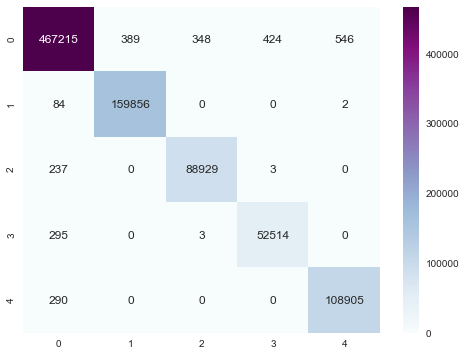

In [40]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


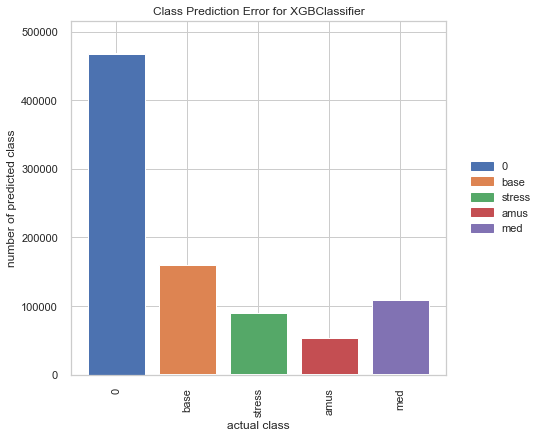

In [41]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [42]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 99.80%


#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [43]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [44]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(3563613, 8)


In [45]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [46]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    3.383437e-204
c_ecg      0.000000e+00
dtype: float64

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9342    0.9106    0.9223   1864355
         1.0     0.9880    0.9597    0.9736    688099
         2.0     0.7525    0.7868    0.7693    274066
         3.0     0.7509    0.8452    0.7953    240178
         4.0     0.9119    0.9562    0.9336    496915

    accuracy                         0.9125   3563613
   macro avg     0.8675    0.8917    0.8788   3563613
weighted avg     0.9152    0.9125    0.9134   3563613



#### QDA + Normalization + Cross Validation = 10

In [48]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9203    0.9494    0.9346   1864355
         1.0     0.9939    0.9613    0.9774    688099
         2.0     0.9299    0.6678    0.7774    274066
         3.0     0.8077    0.8718    0.8385    240178
         4.0     0.9460    0.9878    0.9664    496915

    accuracy                         0.9301   3563613
   macro avg     0.9196    0.8876    0.8989   3563613
weighted avg     0.9313    0.9301    0.9287   3563613



### Model ACC TEMP EDA

#### XGBoost

In [49]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3520160, 5)
(880040,)


In [50]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:47:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[17:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 334 extra nodes, 34 pruned nodes, max_depth=10
[17:47:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 38 pruned nodes, max_depth=10
[17:47:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 22 pruned nodes, max_depth=7
[17:47:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgbo

[17:49:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 12 pruned nodes, max_depth=10
[6]	validation_0-merror:0.15599	validation_1-merror:0.15593
[17:49:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 38 pruned nodes, max_depth=10
[17:49:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 26 pruned nodes, max_depth=10
[17:49:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 22 pruned nodes, max_depth=8
[17:49:11] INFO: C:/buildkite-agen

[17:50:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 50 pruned nodes, max_depth=10
[13]	validation_0-merror:0.12474	validation_1-merror:0.12481
[17:50:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 46 pruned nodes, max_depth=10
[17:50:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 24 pruned nodes, max_depth=9
[17:50:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 46 pruned nodes, max_depth=9
[17:50:27] INFO: C:/buildkite-agent

[17:51:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 52 pruned nodes, max_depth=10
[20]	validation_0-merror:0.09371	validation_1-merror:0.09384
[17:51:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 56 pruned nodes, max_depth=9
[17:51:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 14 pruned nodes, max_depth=8
[17:51:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 48 pruned nodes, max_depth=9
[17:51:44] INFO: C:/buildkite-agent/b

[17:52:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 34 pruned nodes, max_depth=10
[27]	validation_0-merror:0.07443	validation_1-merror:0.07492
[17:52:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 48 pruned nodes, max_depth=8
[17:53:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 8 pruned nodes, max_depth=9
[17:53:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 58 pruned nodes, max_depth=10
[17:53:05] INFO: C:/buildkite-agent/

[17:54:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 34 pruned nodes, max_depth=10
[34]	validation_0-merror:0.06594	validation_1-merror:0.06650
[17:54:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 56 pruned nodes, max_depth=10
[17:54:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 90 pruned nodes, max_depth=10
[17:54:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 34 pruned nodes, max_depth=9
[17:54:19] INFO: C:/buildkite-agent

[17:55:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 28 pruned nodes, max_depth=10
[41]	validation_0-merror:0.05490	validation_1-merror:0.05536
[17:55:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 68 pruned nodes, max_depth=9
[17:55:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 22 pruned nodes, max_depth=7
[17:55:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 60 pruned nodes, max_depth=10
[17:55:45] INFO: C:/buildkite-agent/

[17:57:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 12 pruned nodes, max_depth=8
[48]	validation_0-merror:0.04834	validation_1-merror:0.04890
[17:57:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 56 pruned nodes, max_depth=9
[17:57:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 32 pruned nodes, max_depth=9
[17:57:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 28 pruned nodes, max_depth=7
[17:57:08] INFO: C:/buildkite-agent/bui

[17:58:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 12 pruned nodes, max_depth=7
[55]	validation_0-merror:0.04476	validation_1-merror:0.04527
[17:58:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 88 pruned nodes, max_depth=9
[17:58:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 26 pruned nodes, max_depth=7
[17:58:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 30 pruned nodes, max_depth=7
[17:58:29] INFO: C:/buildkite-agent/bui

[17:59:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 28 pruned nodes, max_depth=10
[62]	validation_0-merror:0.04132	validation_1-merror:0.04181
[17:59:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 92 pruned nodes, max_depth=9
[17:59:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 66 pruned nodes, max_depth=7
[17:59:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 60 pruned nodes, max_depth=9
[17:59:57] INFO: C:/buildkite-agent/bu

[18:01:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 58 pruned nodes, max_depth=8
[69]	validation_0-merror:0.03818	validation_1-merror:0.03859
[18:01:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 76 pruned nodes, max_depth=9
[18:01:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 146 pruned nodes, max_depth=10
[18:01:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 96 pruned nodes, max_depth=10
[18:01:19] INFO: C:/buildkite-agen

[18:02:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 50 pruned nodes, max_depth=7
[76]	validation_0-merror:0.03555	validation_1-merror:0.03608
[18:02:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 134 pruned nodes, max_depth=10
[18:02:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 42 pruned nodes, max_depth=7
[18:02:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 74 pruned nodes, max_depth=7
[18:02:52] INFO: C:/buildkite-agent/

[18:04:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 70 pruned nodes, max_depth=7
[83]	validation_0-merror:0.03342	validation_1-merror:0.03404
[18:04:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 114 pruned nodes, max_depth=9
[18:04:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 64 pruned nodes, max_depth=10
[18:04:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 80 pruned nodes, max_depth=10
[18:04:14] INFO: C:/buildkite-agent

[18:05:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 40 pruned nodes, max_depth=8
[90]	validation_0-merror:0.03138	validation_1-merror:0.03194
[18:05:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 96 pruned nodes, max_depth=8
[18:05:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 150 pruned nodes, max_depth=9
[18:05:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 60 pruned nodes, max_depth=5
[18:05:39] INFO: C:/buildkite-agent/bu

[18:06:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 48 pruned nodes, max_depth=8
[97]	validation_0-merror:0.02945	validation_1-merror:0.02993
[18:07:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 104 pruned nodes, max_depth=8
[18:07:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 24 pruned nodes, max_depth=8
[18:07:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 50 pruned nodes, max_depth=6
[18:07:07] INFO: C:/buildkite-agent/bu

[18:08:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 50 pruned nodes, max_depth=7
[104]	validation_0-merror:0.02816	validation_1-merror:0.02857
[18:08:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 48 pruned nodes, max_depth=10
[18:08:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 46 pruned nodes, max_depth=10
[18:08:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 38 pruned nodes, max_depth=8
[18:08:33] INFO: C:/buildkite-agent

[18:09:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 58 pruned nodes, max_depth=7
[111]	validation_0-merror:0.02719	validation_1-merror:0.02752
[18:09:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 100 pruned nodes, max_depth=7
[18:09:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 76 pruned nodes, max_depth=8
[18:09:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 50 pruned nodes, max_depth=6
[18:09:51] INFO: C:/buildkite-agent/b

[18:11:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 48 pruned nodes, max_depth=7
[118]	validation_0-merror:0.02644	validation_1-merror:0.02669
[18:11:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 96 pruned nodes, max_depth=8
[18:11:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 24 pruned nodes, max_depth=5
[18:11:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 52 pruned nodes, max_depth=6
[18:11:19] INFO: C:/buildkite-agent/bu

[18:12:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 20 pruned nodes, max_depth=6
[125]	validation_0-merror:0.02562	validation_1-merror:0.02586
[18:12:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 120 pruned nodes, max_depth=7
[18:12:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 82 pruned nodes, max_depth=8
[18:12:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 64 pruned nodes, max_depth=6
[18:12:48] INFO: C:/buildkite-agent/b

[18:14:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 38 pruned nodes, max_depth=7
[132]	validation_0-merror:0.02503	validation_1-merror:0.02531
[18:14:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 134 pruned nodes, max_depth=10
[18:14:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 114 pruned nodes, max_depth=8
[18:14:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 70 pruned nodes, max_depth=7
[18:14:11] INFO: C:/buildkite-agen

[18:15:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 20 pruned nodes, max_depth=6
[139]	validation_0-merror:0.02447	validation_1-merror:0.02478
[18:15:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 160 pruned nodes, max_depth=8
[18:15:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 28 pruned nodes, max_depth=6
[18:15:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 48 pruned nodes, max_depth=9
[18:15:33] INFO: C:/buildkite-agent/b

[18:16:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 74 pruned nodes, max_depth=8
[146]	validation_0-merror:0.02381	validation_1-merror:0.02409
[18:16:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 152 pruned nodes, max_depth=8
[18:16:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 18 pruned nodes, max_depth=6
[18:17:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 94 pruned nodes, max_depth=10
[18:17:03] INFO: C:/buildkite-agent

[18:18:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 50 pruned nodes, max_depth=9
[153]	validation_0-merror:0.02293	validation_1-merror:0.02320
[18:18:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 78 pruned nodes, max_depth=10
[18:18:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 46 pruned nodes, max_depth=6
[18:18:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 114 pruned nodes, max_depth=10
[18:18:28] INFO: C:/buildkite-age

[18:19:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 60 pruned nodes, max_depth=7
[160]	validation_0-merror:0.02229	validation_1-merror:0.02262
[18:20:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 128 pruned nodes, max_depth=10
[18:20:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 78 pruned nodes, max_depth=7
[18:20:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 90 pruned nodes, max_depth=9
[18:20:14] INFO: C:/buildkite-agent

[18:21:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 32 pruned nodes, max_depth=6
[167]	validation_0-merror:0.02158	validation_1-merror:0.02195
[18:21:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 98 pruned nodes, max_depth=10
[18:21:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 74 pruned nodes, max_depth=10
[18:21:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 120 pruned nodes, max_depth=10
[18:21:36] INFO: C:/buildkite-ag

[18:22:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 76 pruned nodes, max_depth=8
[174]	validation_0-merror:0.02113	validation_1-merror:0.02148
[18:22:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 152 pruned nodes, max_depth=9
[18:22:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 74 pruned nodes, max_depth=5
[18:22:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 116 pruned nodes, max_depth=10
[18:22:55] INFO: C:/buildkite-agen

[18:24:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 74 pruned nodes, max_depth=5
[181]	validation_0-merror:0.02064	validation_1-merror:0.02098
[18:24:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 150 pruned nodes, max_depth=6
[18:24:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 70 pruned nodes, max_depth=5
[18:24:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 114 pruned nodes, max_depth=10
[18:24:14] INFO: C:/buildkite-agent

[18:25:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 72 pruned nodes, max_depth=5
[188]	validation_0-merror:0.02025	validation_1-merror:0.02058
[18:25:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 124 pruned nodes, max_depth=6
[18:25:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 34 pruned nodes, max_depth=9
[18:25:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 60 pruned nodes, max_depth=6
[18:25:37] INFO: C:/buildkite-agent/b

[18:26:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 66 pruned nodes, max_depth=6
[195]	validation_0-merror:0.01992	validation_1-merror:0.02030
[18:26:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 152 pruned nodes, max_depth=7
[18:27:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 62 pruned nodes, max_depth=5
[18:27:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 84 pruned nodes, max_depth=10
[18:27:07] INFO: C:/buildkite-agent/

[18:28:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 30 pruned nodes, max_depth=6
[202]	validation_0-merror:0.01964	validation_1-merror:0.02001
[18:28:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 178 pruned nodes, max_depth=7
[18:28:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 50 pruned nodes, max_depth=6
[18:28:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 60 pruned nodes, max_depth=6
[18:28:27] INFO: C:/buildkite-agent/b

[18:29:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 74 pruned nodes, max_depth=8
[209]	validation_0-merror:0.01945	validation_1-merror:0.01982
[18:29:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 168 pruned nodes, max_depth=5
[18:29:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 42 pruned nodes, max_depth=5
[18:29:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 60 pruned nodes, max_depth=7
[18:30:00] INFO: C:/buildkite-agent/b

[18:31:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 46 pruned nodes, max_depth=7
[216]	validation_0-merror:0.01922	validation_1-merror:0.01956
[18:31:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 128 pruned nodes, max_depth=6
[18:31:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 30 pruned nodes, max_depth=8
[18:31:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 68 pruned nodes, max_depth=5
[18:31:30] INFO: C:/buildkite-agent/b

[18:33:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 76 pruned nodes, max_depth=4
[223]	validation_0-merror:0.01884	validation_1-merror:0.01915
[18:33:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 156 pruned nodes, max_depth=6
[18:33:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 44 pruned nodes, max_depth=7
[18:33:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 88 pruned nodes, max_depth=10
[18:33:19] INFO: C:/buildkite-agent/

[18:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 28 pruned nodes, max_depth=7
[230]	validation_0-merror:0.01862	validation_1-merror:0.01896
[18:35:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 148 pruned nodes, max_depth=10
[18:35:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 74 pruned nodes, max_depth=8
[18:35:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 112 pruned nodes, max_depth=10
[18:35:20] INFO: C:/buildkite-age

[18:36:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 80 pruned nodes, max_depth=7
[237]	validation_0-merror:0.01838	validation_1-merror:0.01870
[18:36:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 178 pruned nodes, max_depth=10
[18:36:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 50 pruned nodes, max_depth=7
[18:37:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 100 pruned nodes, max_depth=9
[18:37:02] INFO: C:/buildkite-agen

[18:38:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 80 pruned nodes, max_depth=4
[244]	validation_0-merror:0.01814	validation_1-merror:0.01843
[18:38:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 148 pruned nodes, max_depth=10
[18:38:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 56 pruned nodes, max_depth=7
[18:38:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 54 pruned nodes, max_depth=5
[18:38:37] INFO: C:/buildkite-agent/

[18:40:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 48 pruned nodes, max_depth=8
[251]	validation_0-merror:0.01794	validation_1-merror:0.01826
[18:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 198 pruned nodes, max_depth=4
[18:40:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 44 pruned nodes, max_depth=6
[18:40:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 60 pruned nodes, max_depth=5
[18:40:20] INFO: C:/buildkite-agent/b

[18:41:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 62 pruned nodes, max_depth=4
[258]	validation_0-merror:0.01773	validation_1-merror:0.01806
[18:41:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 140 pruned nodes, max_depth=10
[18:41:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 32 pruned nodes, max_depth=7
[18:41:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 100 pruned nodes, max_depth=9
[18:41:38] INFO: C:/buildkite-agent

[18:42:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 70 pruned nodes, max_depth=4
[265]	validation_0-merror:0.01754	validation_1-merror:0.01791
[18:43:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 130 pruned nodes, max_depth=9
[18:43:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 48 pruned nodes, max_depth=6
[18:43:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 90 pruned nodes, max_depth=4
[18:43:10] INFO: C:/buildkite-agent/b

[18:44:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 54 pruned nodes, max_depth=4
[272]	validation_0-merror:0.01735	validation_1-merror:0.01768
[18:44:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 186 pruned nodes, max_depth=4
[18:44:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 84 pruned nodes, max_depth=7
[18:44:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 90 pruned nodes, max_depth=7
[18:44:54] INFO: C:/buildkite-agent/b

[18:46:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 24 pruned nodes, max_depth=4
[279]	validation_0-merror:0.01716	validation_1-merror:0.01747
[18:46:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 206 pruned nodes, max_depth=10
[18:46:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 96 pruned nodes, max_depth=7
[18:46:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 80 pruned nodes, max_depth=3
[18:46:37] INFO: C:/buildkite-agent/

[18:48:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 74 pruned nodes, max_depth=5
[286]	validation_0-merror:0.01702	validation_1-merror:0.01733
[18:48:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 156 pruned nodes, max_depth=9
[18:48:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 70 pruned nodes, max_depth=10
[18:48:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 100 pruned nodes, max_depth=10
[18:48:09] INFO: C:/buildkite-agen

[18:48:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 74 pruned nodes, max_depth=4
[293]	validation_0-merror:0.01687	validation_1-merror:0.01721
[18:48:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 180 pruned nodes, max_depth=4
[18:48:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 66 pruned nodes, max_depth=5
[18:48:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 52 pruned nodes, max_depth=4
[18:48:57] INFO: C:/buildkite-agent/b

In [51]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.9792597928761209
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9879    0.9809    0.9844    468988
           1     0.9946    0.9966    0.9956    160102
           2     0.9802    0.9775    0.9789     89511
           3     0.9404    0.9489    0.9446     52420
           4     0.9675    0.9925    0.9798    109019

    accuracy                         0.9829    880040
   macro avg     0.9741    0.9793    0.9767    880040
weighted avg     0.9830    0.9829    0.9829    880040



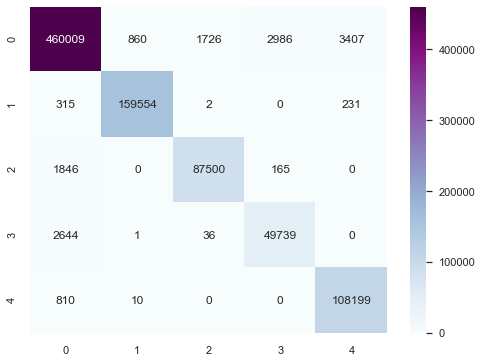

In [52]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


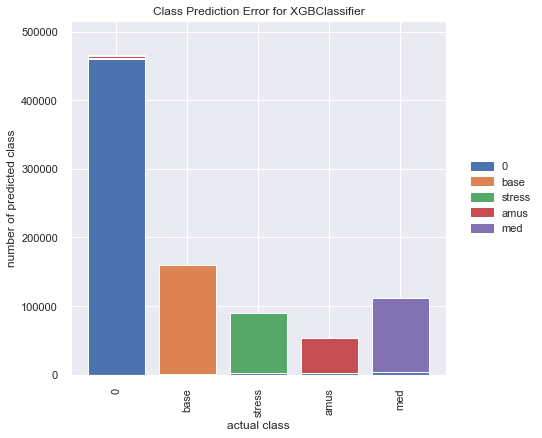

In [53]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [54]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 98.71%


In [55]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [56]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(4000941, 6)


In [57]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [58]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9284    0.9140    0.9212   2125054
         1.0     0.9779    0.9385    0.9578    760894
         2.0     0.7919    0.8434    0.8168    306628
         3.0     0.7822    0.8600    0.8192    262364
         4.0     0.9219    0.9516    0.9365    546001

    accuracy                         0.9148   4000941
   macro avg     0.8805    0.9015    0.8903   4000941
weighted avg     0.9169    0.9148    0.9155   4000941



#### QDA + Normalization + Cross Validation = 10

In [60]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9212    0.9490    0.9349   2125054
         1.0     0.9935    0.9598    0.9764    760894
         2.0     0.9241    0.6578    0.7685    306628
         3.0     0.7989    0.8738    0.8347    262364
         4.0     0.9450    0.9891    0.9665    546001

    accuracy                         0.9293   4000941
   macro avg     0.9165    0.8859    0.8962   4000941
weighted avg     0.9304    0.9293    0.9278   4000941

